**Installing the required packages**

In [ ]:
pip install --upgrade youtube-dl ipython pytube opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.0/810.0 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.21.0 whi

**Importing the required libraries**

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from google.colab.patches import cv2_imshow

import random
from IPython.display import Video
from pytube import YouTube

**Loading the Dataset**

In [ ]:
# Function to load CIFAR-10 data
def load_cifar10_data(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file, encoding='bytes')
    return data

In [ ]:
# Loading the dataset
file_path = '/content/data_batch_1'
batch_data = load_cifar10_data(file_path)
data = batch_data[b'data']
labels = batch_data[b'labels']

# Selecting 10 images (all from data_batch_1)
selected_images = []
selected_labels = []

#Selecting images from each class so that each class is represented
for i in range(len(labels)):
    if labels[i] not in selected_labels:
        selected_labels.append(labels[i])
        selected_images.append(data[i])

**IMAGE SEGMENTATION**

**Image Segmentation with K-Means and Mean-Shift and feature extraction using Canny Edge Detector**



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

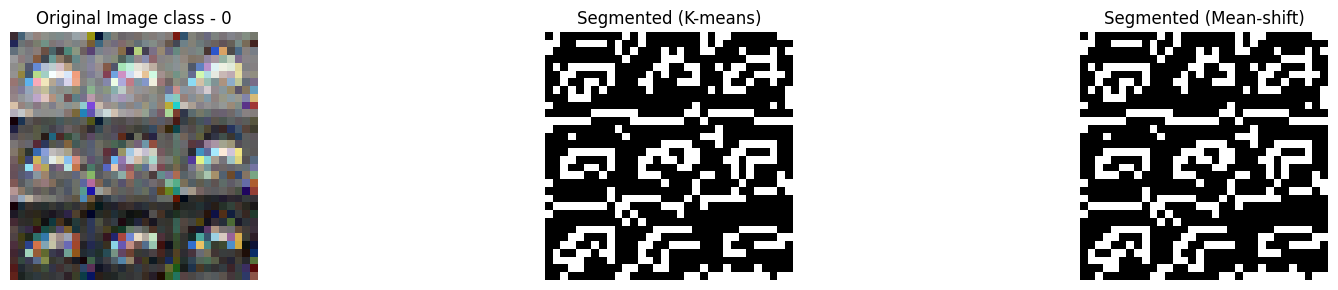

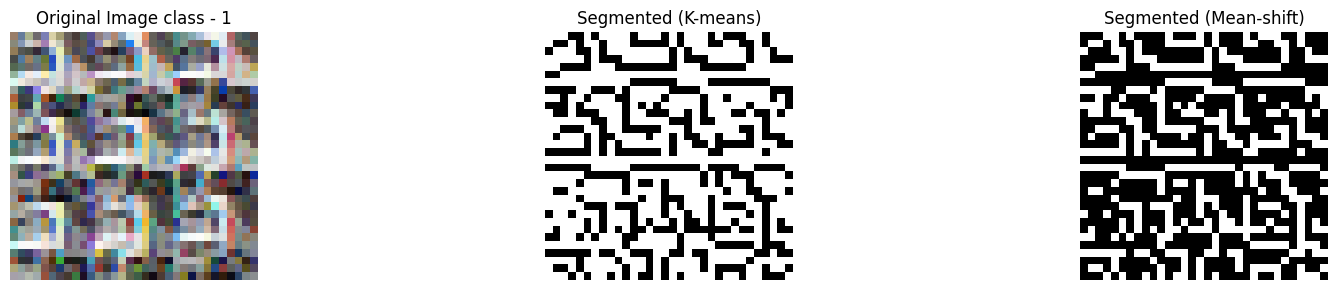

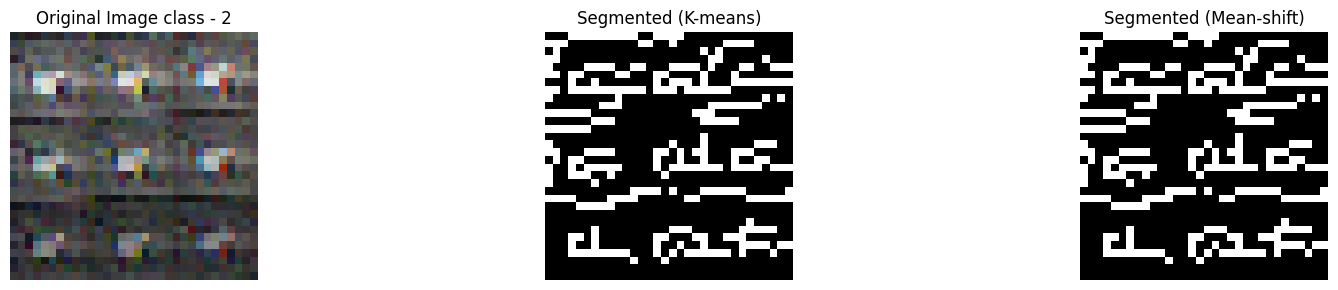

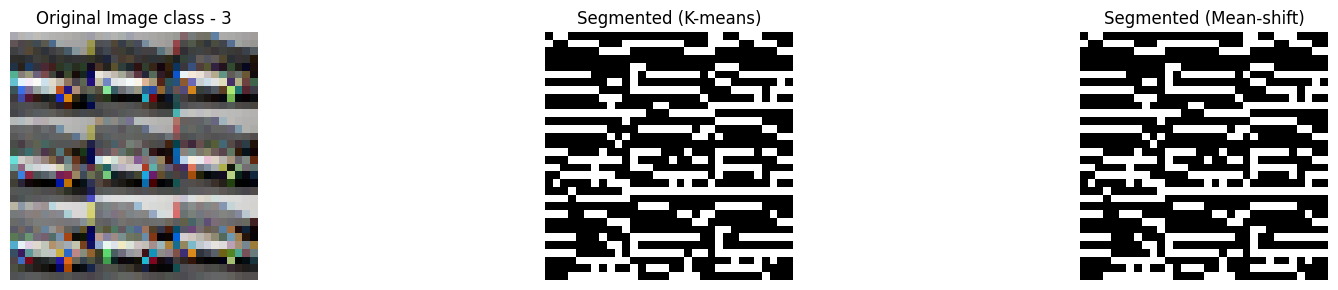

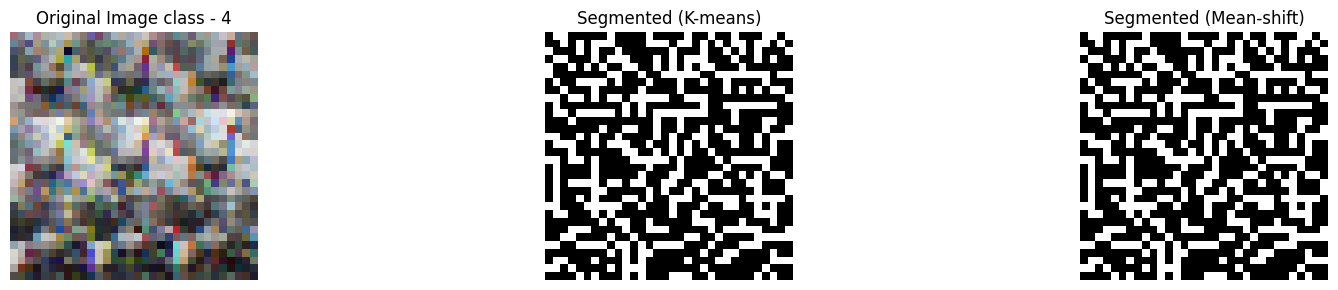

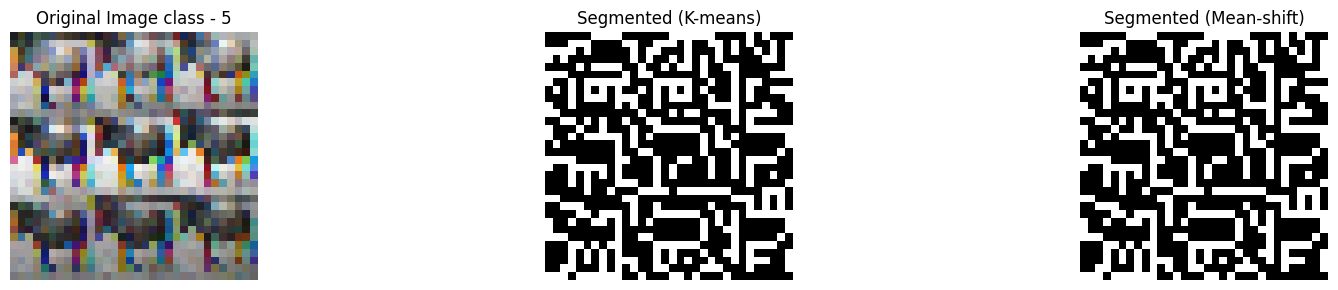

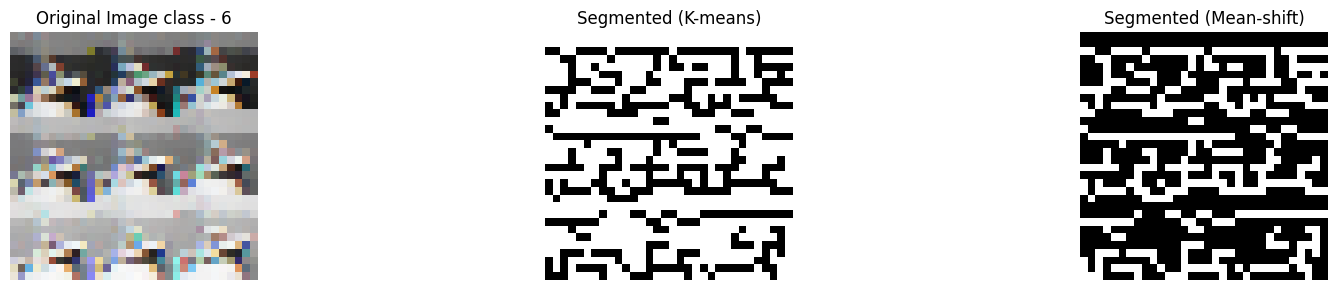

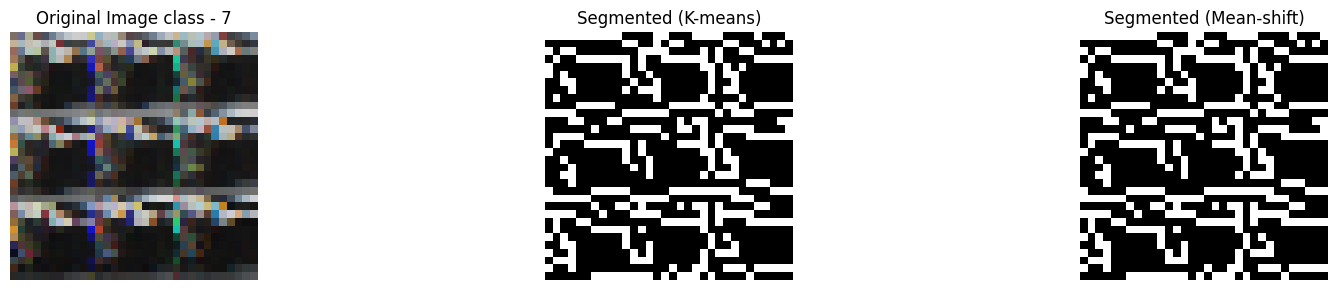

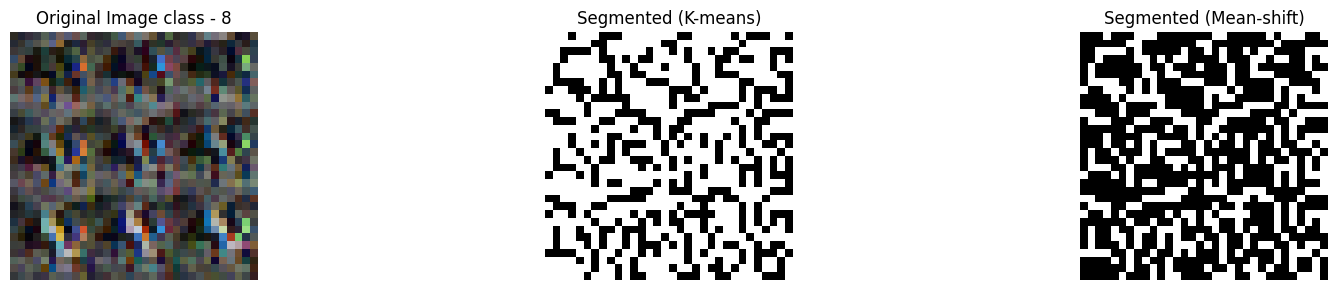

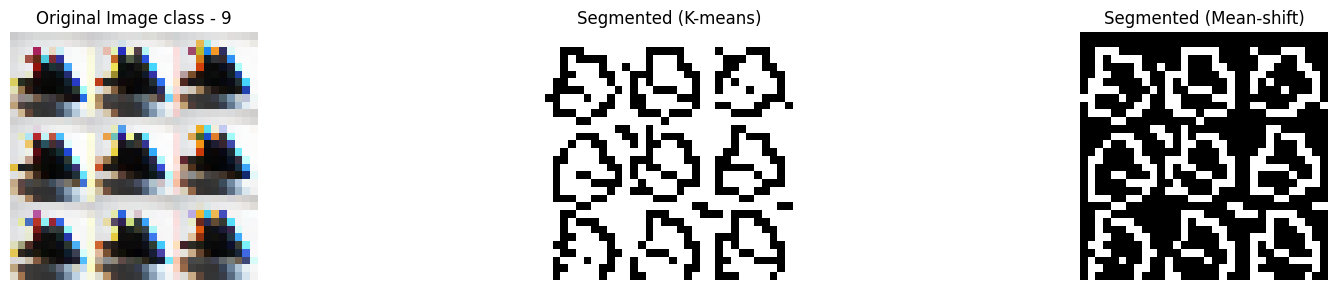

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans, MeanShift
import matplotlib.pyplot as plt

# Load and preprocess the images
images = np.array(selected_images)

segmented_images = []

# Extract features and perform segmentation for each image
for i, image in enumerate(images):
    # Extract features using Canny edge detector
    image = image.reshape((32, 32, 3))
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray_image, 100, 200)
    img_label = i

    # Flatten the feature matrix
    features = edges.reshape(-1, 1)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(features)
    segmented_image_kmeans = kmeans.labels_.reshape(edges.shape)

    # Perform Mean-shift clustering
    mean_shift = MeanShift()
    mean_shift.fit(features)
    segmented_image_mean_shift = mean_shift.labels_.reshape(edges.shape)

    segmented_images.append((image, img_label, segmented_image_kmeans, segmented_image_mean_shift))

# Plot the original and segmented images
for original, img_label, segmented_kmeans, segmented_mean_shift in segmented_images:
    plt.figure(figsize=(18, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(original)
    plt.title(f"Original Image class - {img_label}")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(segmented_kmeans, cmap='gray', interpolation='nearest')
    plt.title("Segmented (K-means)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(segmented_mean_shift, cmap='gray', interpolation='nearest')
    plt.title("Segmented (Mean-shift)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


**Image Segmentation with K-Means and Mean-Shift and feature extraction using Harris Corner Detector**



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

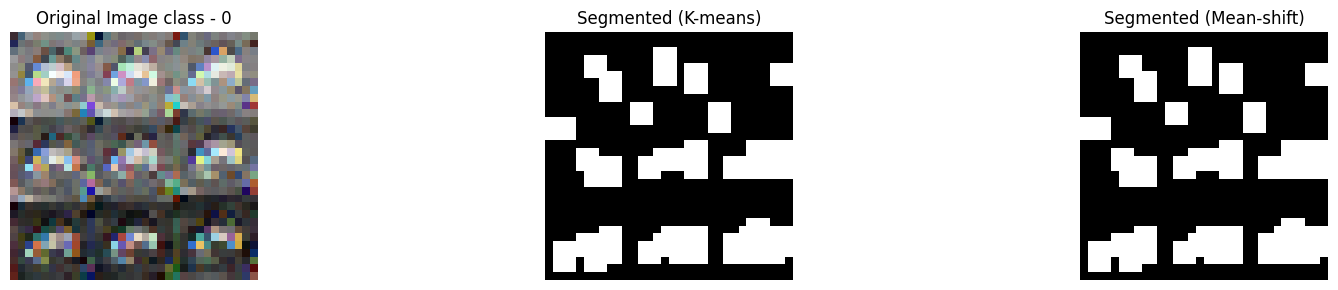

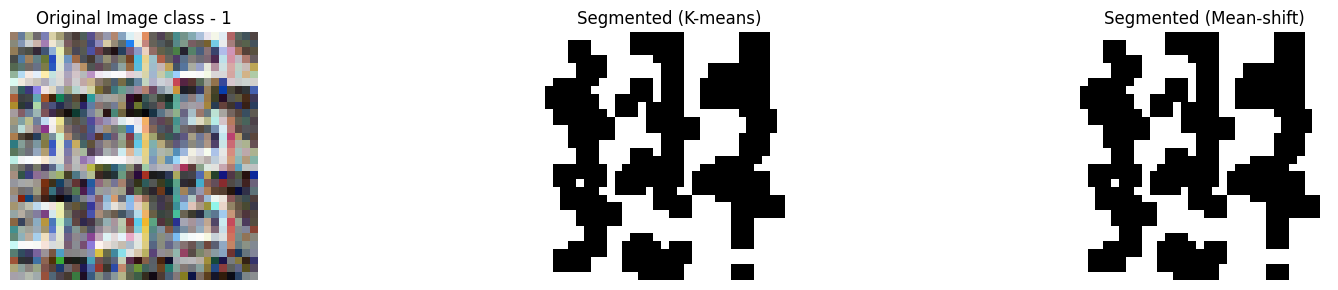

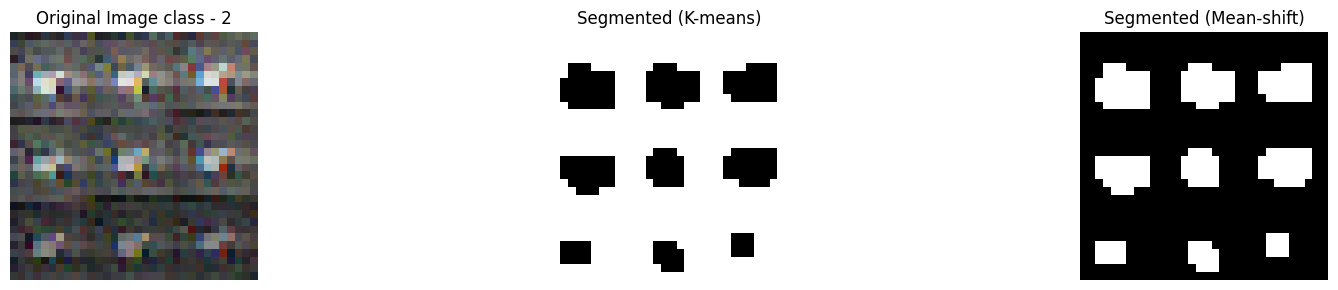

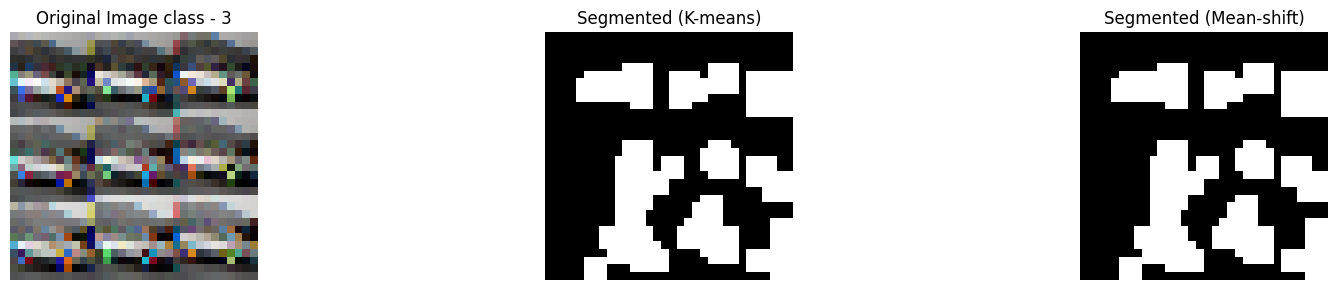

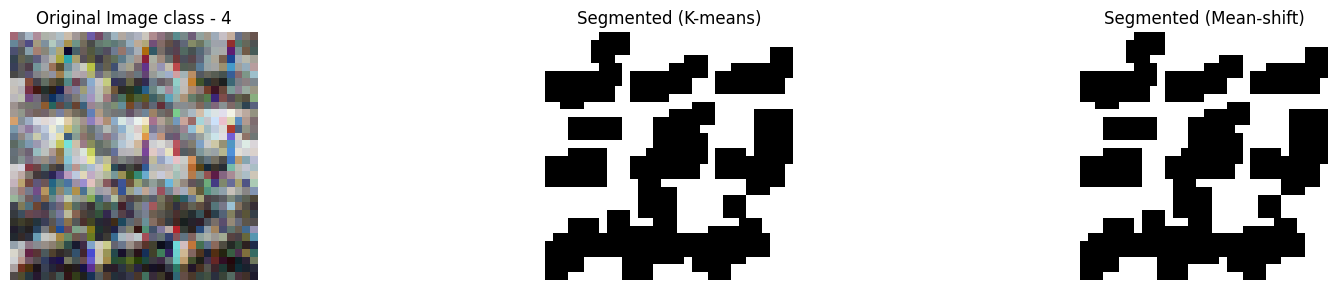

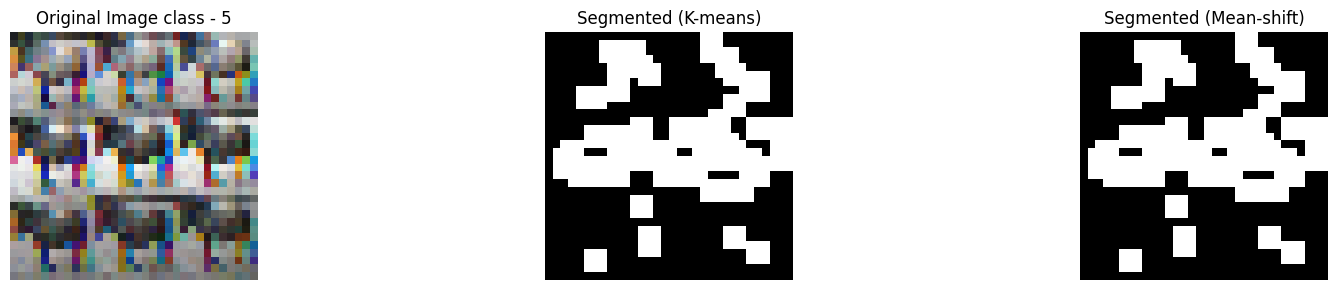

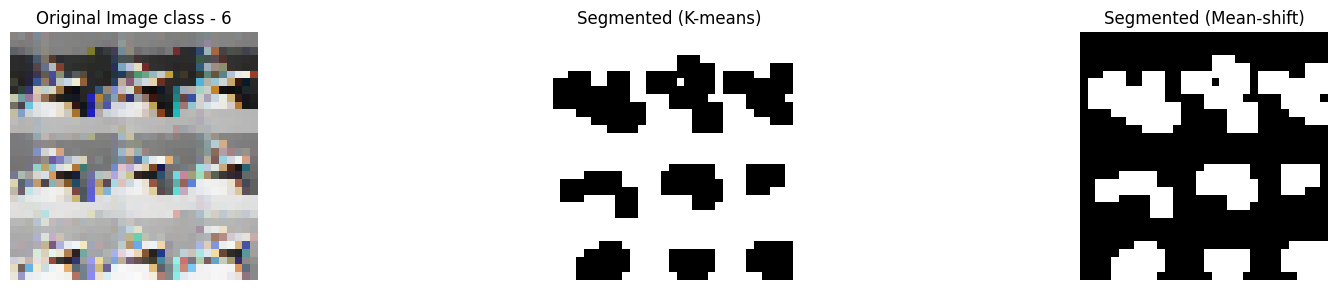

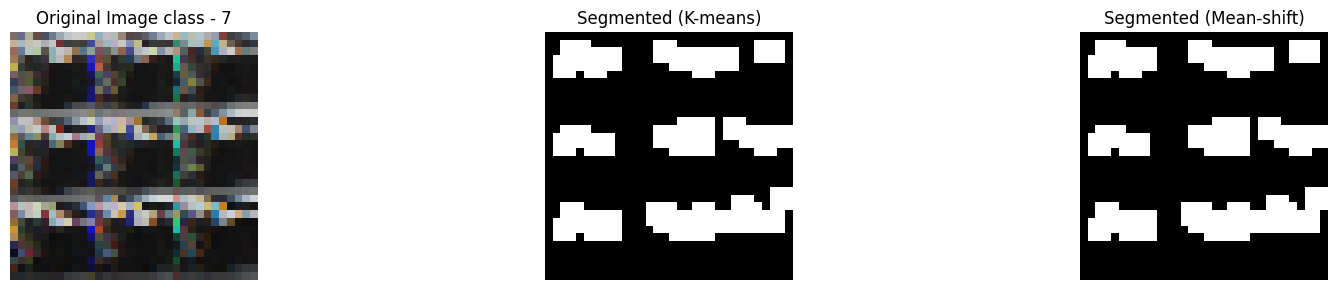

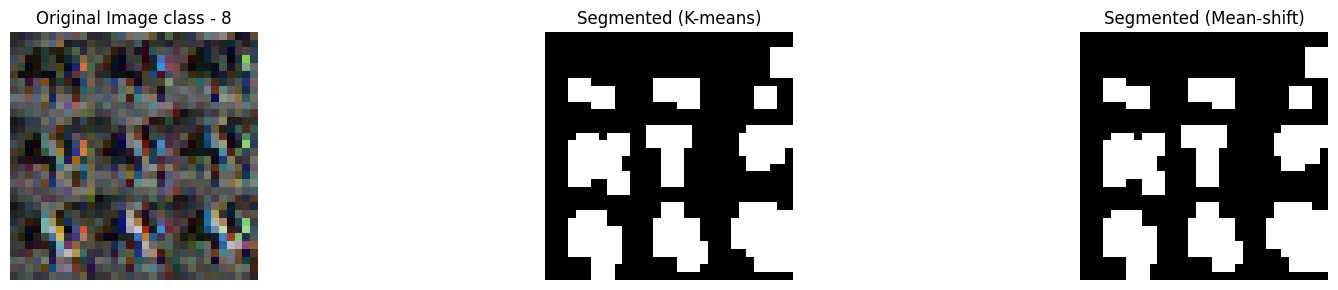

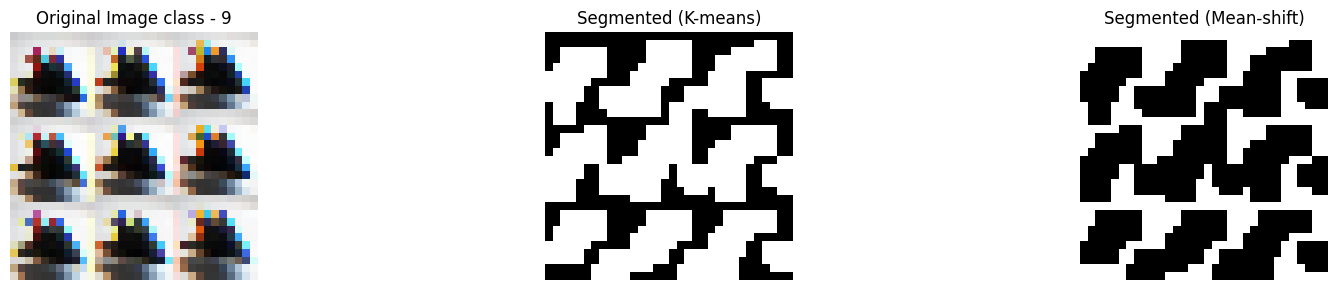

In [10]:
import cv2
import numpy as np
from sklearn.cluster import KMeans, MeanShift
import matplotlib.pyplot as plt

# Loading and preprocessing the images
images = np.array(selected_images)

segmented_images = []

# Extracting features and perform segmentation for each image
for i, image in enumerate(images):
    # Extracting features using Harris corner detection
    image = image.reshape((32, 32, 3))
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img_label = i
    corners = cv2.cornerHarris(gray_image, blockSize = 2, ksize = 3, k = 0.04)
    corners = cv2.dilate(corners, None)
    # Setting the threshold
    threshold = 0.1 * corners.max()
    corner_mask = np.uint8(corners > threshold)

    # Flattening the feature matrix
    features = corner_mask.reshape(-1, 1)

    # Performing K-means clustering
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(features)
    segmented_image_kmeans = kmeans.labels_.reshape(corner_mask.shape)

    # Performing Mean-shift clustering
    mean_shift = MeanShift()
    mean_shift.fit(features)
    segmented_image_mean_shift = mean_shift.labels_.reshape(corner_mask.shape)

    segmented_images.append((image, img_label, segmented_image_kmeans, segmented_image_mean_shift))

# Plotting the original and segmented images
for original, img_label, segmented_kmeans, segmented_mean_shift in segmented_images:
    plt.figure(figsize=(18, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(original)
    plt.title(f"Original Image class - {img_label}")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(segmented_kmeans, cmap='gray', interpolation='nearest')
    plt.title("Segmented (K-means)")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(segmented_mean_shift, cmap='gray', interpolation='nearest')
    plt.title("Segmented (Mean-shift)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()